# **Heart Disease Diagnostic Analysis**

In [1]:
#Importing Libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set_style('whitegrid')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data = pd.read_csv("/content/drive/MyDrive/Unified Project/Heart Disease data.csv")

In [4]:
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [5]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [6]:
#All Columns in the Dataset

data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

**There are 13 features in Dataset**

- age: The person's age in years
- sex: The person's sex (1 = male, 0 = female)
- cp: The chest pain experienced (Value 1: typical angina, Value 2: atypical angina, Value 3: non-anginal pain, Value 4: asymptomatic)
- trestbps: The person's resting blood pressure (mm Hg on admission to the hospital)
- chol: The person's cholesterol measurement in mg/dl
- fbs: The person's fasting blood sugar (> 120 mg/dl, 1 = true; 0 = false)
- restecg: Resting electrocardiographic measurement (0 = normal, 1 = having ST-T wave abnormality, 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria)
- thalach: The person's maximum heart rate achieved
- exang: Exercise induced angina (1 = yes; 0 = no)
- oldpeak: ST depression induced by exercise relative to rest
- slope: the slope of the peak exercise ST segment (Value 1: upsloping, Value 2: flat, Value 3: downsloping)
- ca: The number of major vessels (0-3)
- thal: A blood disorder called thalassemia (3 = normal; 6 = fixed defect; 7 = reversable defect)
- target: Heart disease (0 = no, 1 = yes)


In [7]:
#Checking null values
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

There is no Missing Value in dataset

In [8]:
#People having Heart Disease
target=data.groupby('target').size()
target

target
0    499
1    526
dtype: int64

- 526 People having heart disease
- 499 people having no heart disease

In [9]:
#Converting Numerical Data into Categorical Data

def heart_disease(row):
    if row==0:
        return 'Absence'
    elif row==1:
        return 'Presence'

In [10]:
#Applying converted data into our dataset with new column - Heart_Disease

data['Heart_Disease']=data['target'].apply(heart_disease)
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,Heart_Disease
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0,Absence
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0,Absence
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0,Absence
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0,Absence
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0,Absence


In [11]:
hd=data.groupby('Heart_Disease')['target'].count()
hd

Heart_Disease
Absence     499
Presence    526
Name: target, dtype: int64

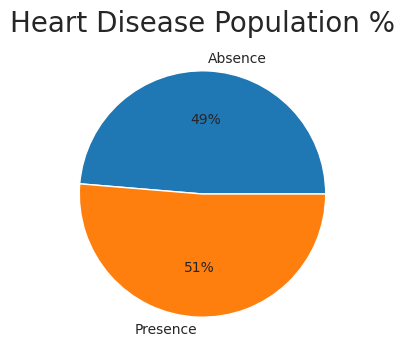

In [13]:
#Pie Chart Creation of Heart Disease Population % using MatplotLib

plt.figure(figsize=(8,4))
plt.pie(hd, labels=['Absence','Presence'], autopct='%0.0f%%')
plt.title('Heart Disease Population %', fontsize=20)
plt.show()

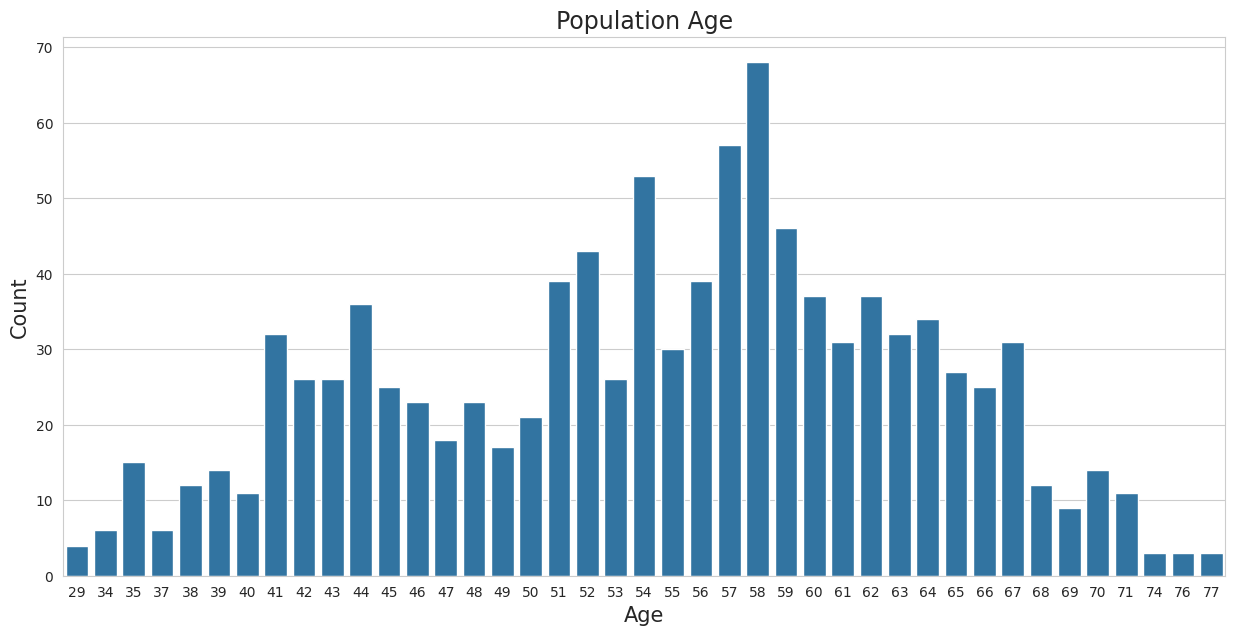

In [ ]:
#Countplot Creation of Population Age using MatplotLib and Seaborn

plt.figure(figsize=(15,7))
sns.countplot(x='age', data=data)
plt.title('Population Age', fontsize=17)
plt.xlabel('Age', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.show()

In [ ]:
#Statistical Analysis

Min_Age=data['age'].min()
Max_Age=data['age'].max()
Mean_Age=data['age'].mean()
print("Minimum Age =",Min_Age)
print("Maximum Age =",Max_Age)
print("Mean Age =",Mean_Age)

Minimum Age = 29
Maximum Age = 77
Mean Age = 54.43414634146342


In [ ]:
#Categorical Analysis

Young_Ages=data[(data['age']>=29) & (data['age']<40)]
Middle_Ages=data[(data['age']>=40) & (data['age']<55)]
Elderly_Ages=data[(data['age']>55)]
print('Young Ages =',len(Young_Ages))
print('Middle Ages =',len(Middle_Ages))
print('Elderly Ages =',len(Elderly_Ages))

Young Ages = 57
Middle Ages = 419
Elderly Ages = 519


<ipython-input-20-5f1f8f273de1>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['Young_Ages','Middle_Ages','Elderly_Ages'], y=[len(Young_Ages), len(Middle_Ages), len(Elderly_Ages)], palette='YlGn_r')


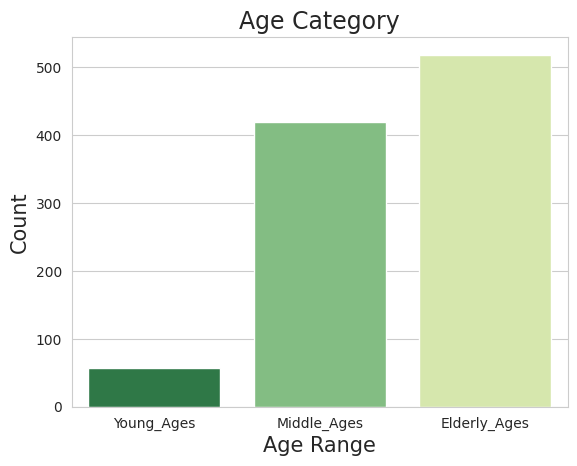

In [ ]:
#Bar Plot Creation of Age Category using MatplotLib and Seaborn

sns.barplot(x=['Young_Ages','Middle_Ages','Elderly_Ages'], y=[len(Young_Ages), len(Middle_Ages), len(Elderly_Ages)], palette='YlGn_r')
plt.title('Age Category', fontsize=17)
plt.xlabel('Age Range', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.show()

In [ ]:
#Converting Numerical Data into Categorical Data

def gender(row):
    if row==1:
        return 'Male'
    elif row==0:
        return 'Female'

In [ ]:
#Applying converted data into our dataset with new column - sex1

data['sex1']=data['sex'].apply(gender)
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,Heart_Disease,sex1
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0,Absence,Male
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0,Absence,Male
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0,Absence,Male
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0,Absence,Male
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0,Absence,Female


In [ ]:
#Converting Numerical Data into Categorical Data

def age_range(row):
    if row>=29 and row<40:
        return 'Young Age'
    elif row>=40 and row<55:
        return 'Middle Age'
    elif row>55:
        return 'Elder Age'

In [ ]:
#Applying converted data into our dataset with new column - Age_Range

data['Age_Range']=data['age'].apply(age_range)
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,Heart_Disease,sex1,Age_Range
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0,Absence,Male,Middle Age
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0,Absence,Male,Middle Age
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0,Absence,Male,Elder Age
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0,Absence,Male,Elder Age
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0,Absence,Female,Elder Age


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 10.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 13.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 23.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


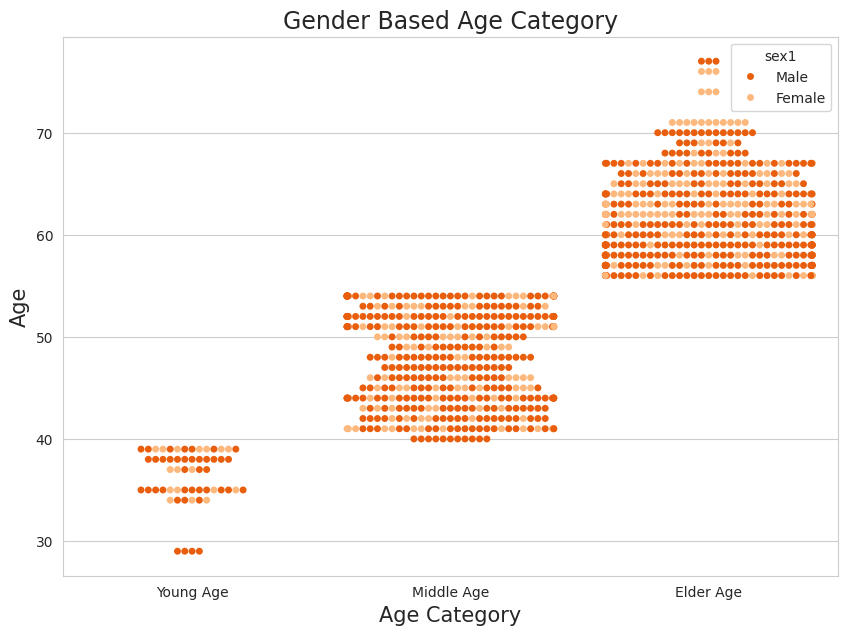

In [ ]:
#Swarm Plot Creation of Gender Based Age Category using MatplotLib and Seaborn

plt.figure(figsize=(10,7))
sns.swarmplot(x='Age_Range', y='age', hue='sex1', data=data, order=['Young Age','Middle Age','Elder Age'], palette='Oranges_r')
plt.title('Gender Based Age Category', fontsize=17)
plt.xlabel('Age Category', fontsize=15)
plt.ylabel('Age', fontsize=15)
plt.show()

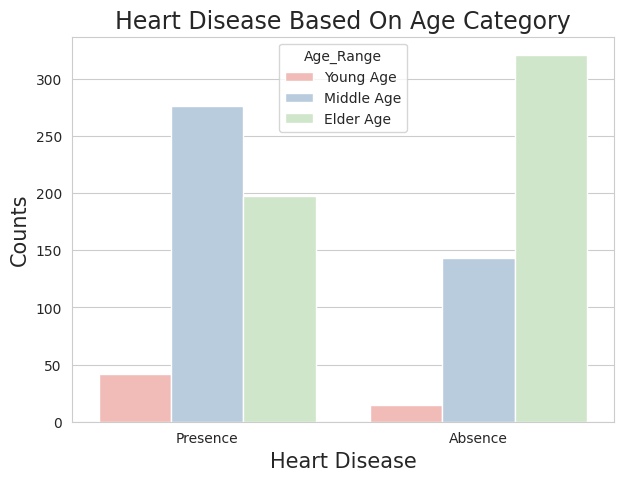

In [ ]:
#Count Plot Creation of Heart Disease Based On Age Category using MatplotLib and Seaborn

plt.figure(figsize=(7,5))
hue_order=['Young Age', 'Middle Age', 'Elder Age']
sns.countplot(x='Heart_Disease', hue='Age_Range', data=data, order=['Presence','Absence'], hue_order=hue_order, palette='Pastel1')
plt.title('Heart Disease Based On Age Category', fontsize=17)
plt.xlabel('Heart Disease', fontsize=15)
plt.ylabel('Counts', fontsize=15)
plt.show()

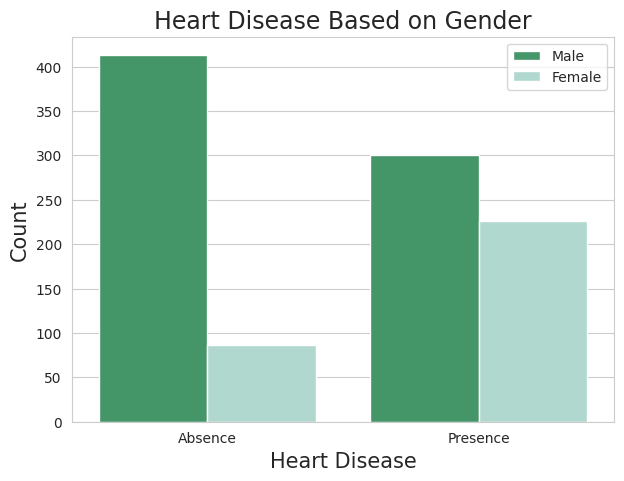

In [ ]:
#Count Plot Creation of Heart Disease Based on Gender using MatplotLib and Seaborn

plt.figure(figsize=(7,5))
sns.countplot(x=data['Heart_Disease'], hue='sex1', data=data, palette='BuGn_r')
plt.xlabel('Heart Disease', fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.legend(labels=['Male','Female'])
plt.title('Heart Disease Based on Gender',fontsize=17)
plt.show()

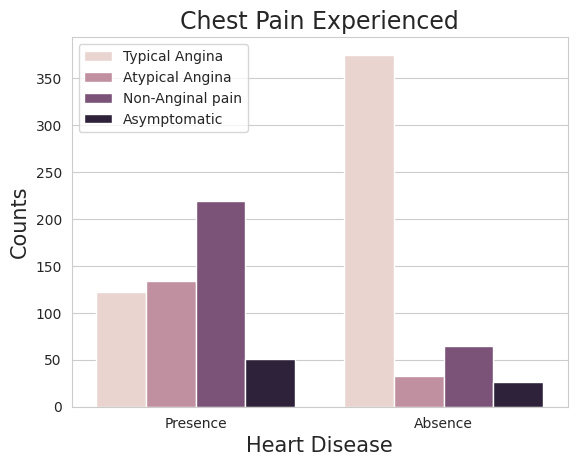

In [ ]:
#Count Plot Creation of Chest Pain Experienced using MatplotLib and Seaborn

sns.countplot(x=data['Heart_Disease'], hue='cp', data=data, order=['Presence','Absence'])
plt.title('Chest Pain Experienced', fontsize=17)
plt.xlabel('Heart Disease',fontsize=15)
plt.ylabel('Counts',fontsize=15)
plt.legend(labels=['Typical Angina','Atypical Angina','Non-Anginal pain','Asymptomatic'])
plt.show()

- It seems people having asymptomatic chest pain have a higher chance of heart disease.
-  Asymptomatic Chest pain means neither causing nor exhibiting symptoms of Heart disease.

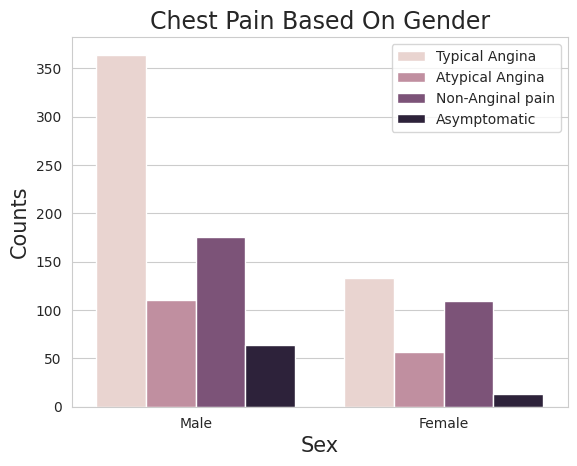

In [ ]:
#Count Plot Creation of Chest Pain Based On Gender using MatplotLib and Seaborn

sns.countplot(x=data['sex1'], hue='cp', data=data)
plt.title('Chest Pain Based On Gender', fontsize=17)
plt.xlabel('Sex', fontsize=15)
plt.ylabel('Counts', fontsize=15)
plt.legend(labels=['Typical Angina','Atypical Angina','Non-Anginal pain','Asymptomatic'])
plt.show()

There is very high number of Asymptomatic Pain in Elderly age Category

<ipython-input-30-37e940b55034>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='sex1', y='trestbps', data=data, palette='plasma')


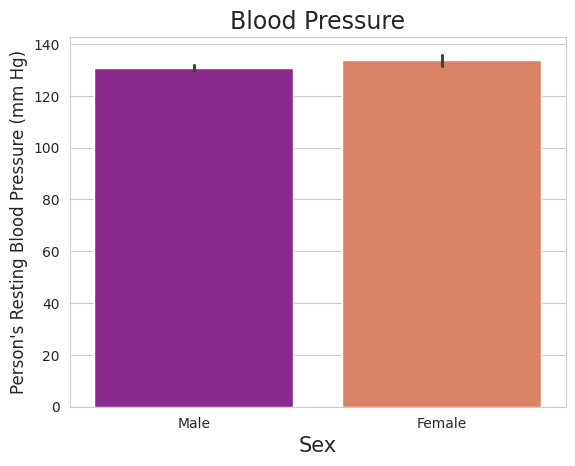

In [ ]:
#Bar Plot Creation of Person's Resting Blood Pressure (mm Hg) using MatplotLib and Seaborn

sns.barplot(x='sex1', y='trestbps', data=data, palette='plasma')
plt.title("Blood Pressure", fontsize=17)
plt.xlabel('Sex',fontsize=15)
plt.ylabel("Person's Resting Blood Pressure (mm Hg)", fontsize=12)
plt.show()

Blood Pressure Rate is almost equal in Males and Females

<ipython-input-31-4fe2024e27b1>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='sex1', y='chol', data=data, palette='turbo')


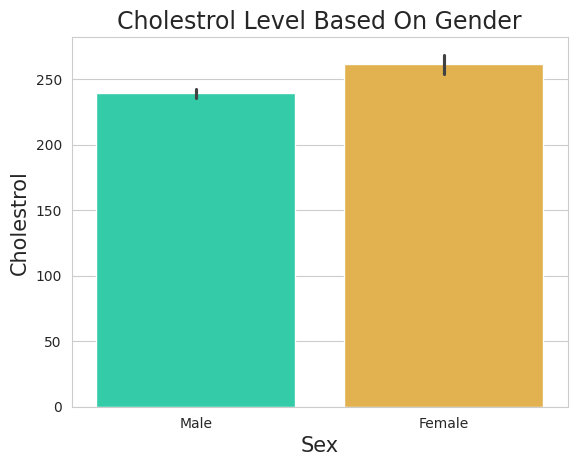

In [ ]:
#Bar Plot Creation of Cholestrol Level Based On Gender using MatplotLib and Seaborn

sns.barplot(x='sex1', y='chol', data=data, palette='turbo')
plt.title("Cholestrol Level Based On Gender", fontsize=17)
plt.xlabel('Sex',fontsize=15)
plt.ylabel("Cholestrol", fontsize=15)
plt.show()

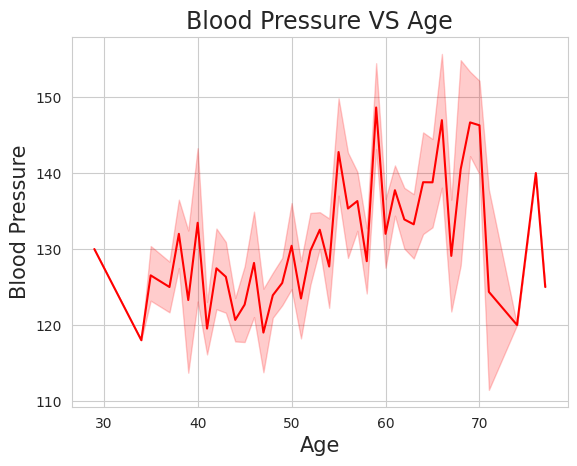

In [ ]:
#Line Plot Creation of Blood Pressure VS Age using MatplotLib and Seaborn

sns.lineplot(x='age', y='trestbps', data=data, color='r')
plt.title('Blood Pressure VS Age', fontsize=17)
plt.xlabel('Age', fontsize=15)
plt.ylabel('Blood Pressure', fontsize=15)
plt.show()

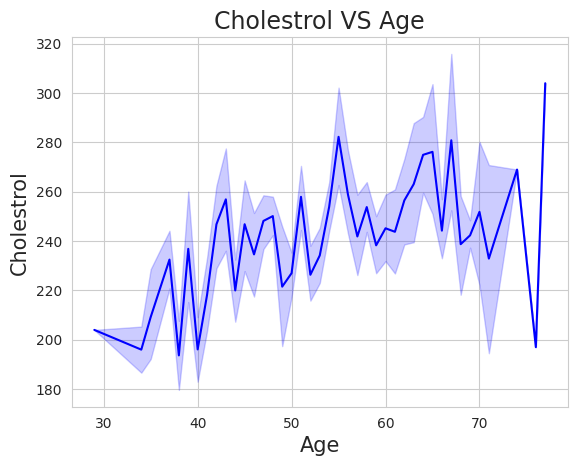

In [ ]:
#Line Plot Creation of Cholestrol VS Age using MatplotLib and Seaborn

sns.lineplot(x='age', y='chol', data=data, color='b')
plt.title('Cholestrol VS Age', fontsize=17)
plt.xlabel('Age', fontsize=15)
plt.ylabel('Cholestrol', fontsize=15)
plt.show()

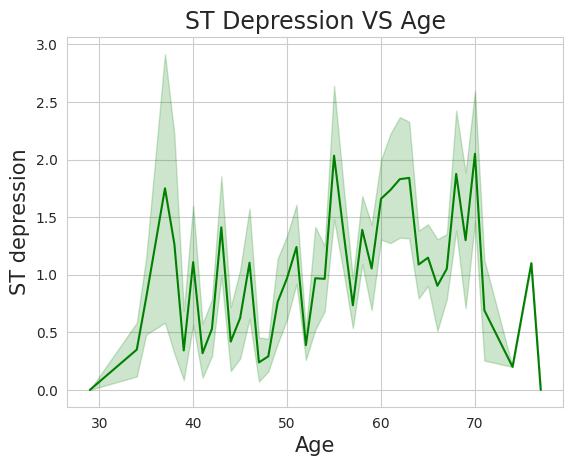

In [ ]:
#Line Plot Creation of ST Depression VS Age using MatplotLib and Seaborn

sns.lineplot(x='age', y='oldpeak', data=data, color='g')
plt.title('ST Depression VS Age', fontsize=17)
plt.xlabel('Age', fontsize=15)
plt.ylabel('ST depression', fontsize=15)
plt.show()

<ipython-input-35-df7084e7e09e>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='sex1', y='oldpeak', data=data, palette='twilight_r')


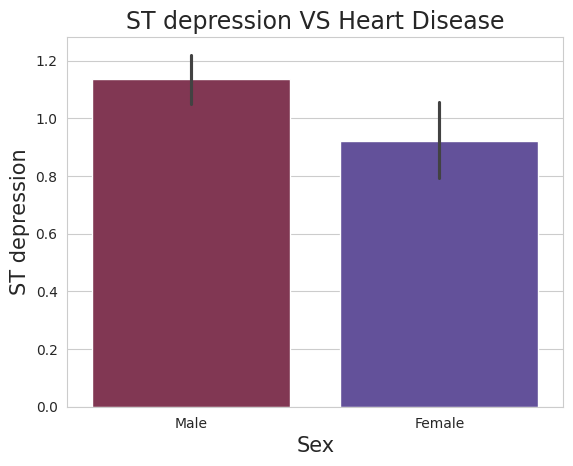

In [ ]:
#Bar Plot Creation of ST depression VS Heart Disease using MatplotLib and Seaborn

sns.barplot(x='sex1', y='oldpeak', data=data, palette='twilight_r')
plt.title('ST depression VS Heart Disease', fontsize=17)
plt.xlabel('Sex', fontsize=15)
plt.ylabel('ST depression', fontsize=15)
plt.show()

<ipython-input-36-e1ce3acd7cb2>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Heart_Disease', y='exang', data=data, palette='viridis')


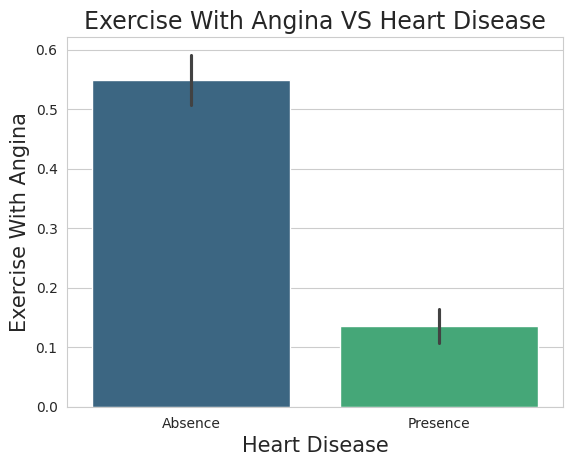

In [ ]:
#Bar Plot Creation of Exercise With Angina VS Heart Disease using MatplotLib and Seaborn

sns.barplot(x='Heart_Disease', y='exang', data=data, palette='viridis')
plt.title('Exercise With Angina VS Heart Disease', fontsize=17)
plt.xlabel('Heart Disease', fontsize=15)
plt.ylabel('Exercise With Angina', fontsize=15)
plt.show()

<ipython-input-37-8c8cd9640718>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='sex1', y='exang', data=data, palette='binary_r')


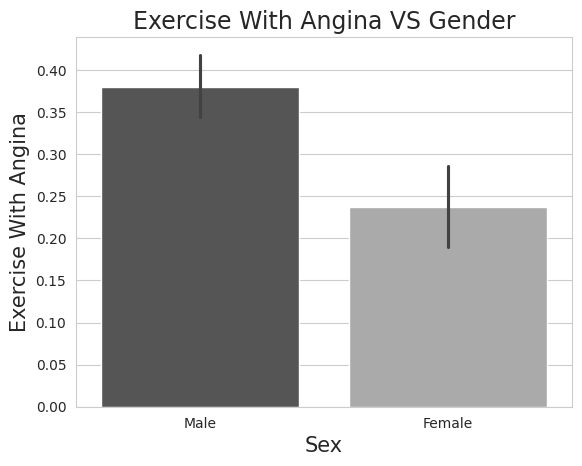

In [ ]:
#Bar Plot Creation of Exercise With Angina VS Gender using MatplotLib and Seaborn

sns.barplot(x='sex1', y='exang', data=data, palette='binary_r')
plt.title('Exercise With Angina VS Gender', fontsize=17)
plt.xlabel('Sex', fontsize=15)
plt.ylabel('Exercise With Angina', fontsize=15)
plt.show()

<ipython-input-38-b2f433eda42c>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='fbs', x='sex1', data=data, palette='hsv')


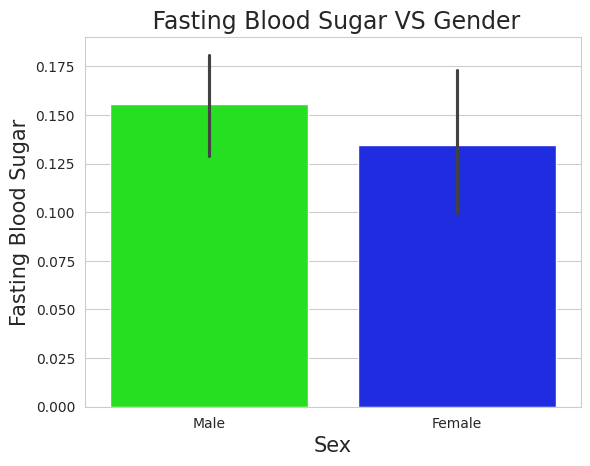

In [ ]:
#Bar Plot Creation of Fasting Blood Sugar VS Gender using MatplotLib and Seaborn

sns.barplot(y='fbs', x='sex1', data=data, palette='hsv')
plt.title(' Fasting Blood Sugar VS Gender', fontsize=17)
plt.xlabel('Sex', fontsize=15)
plt.ylabel('Fasting Blood Sugar', fontsize=15)
plt.show()

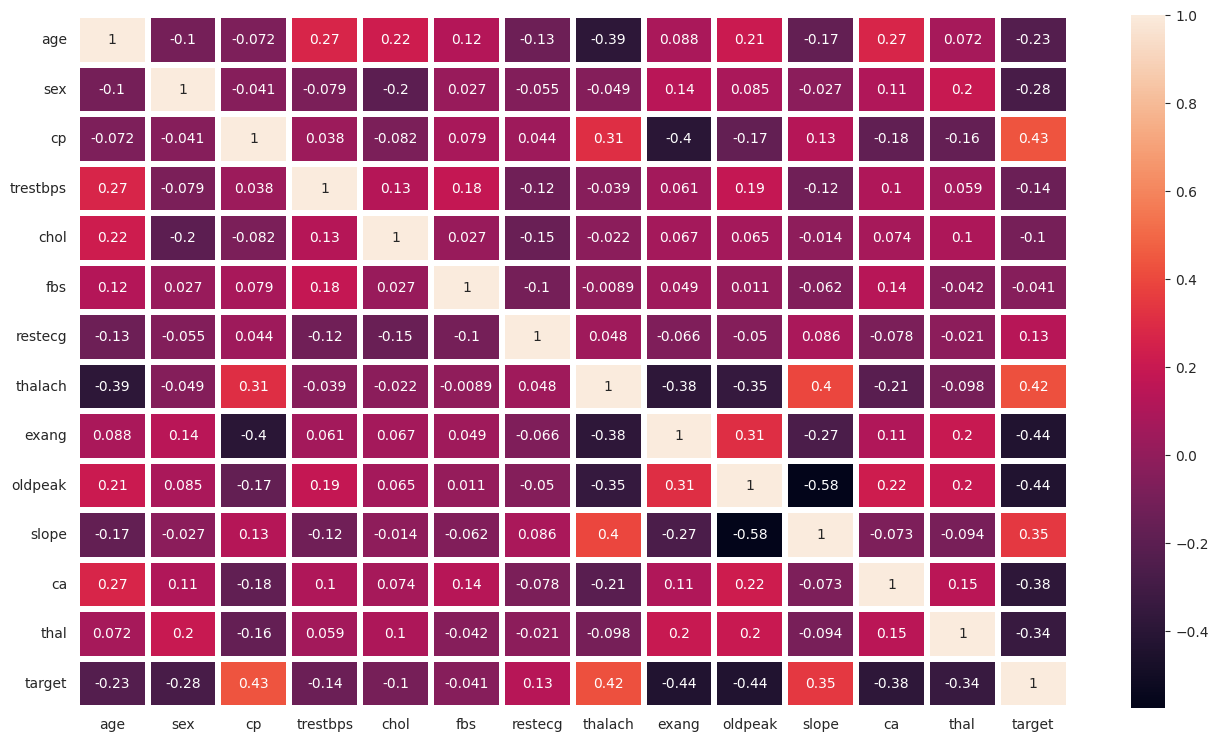

In [ ]:
import pandas as pd

# Check for non-numeric columns
non_numeric_cols = data.select_dtypes(include=['object']).columns

# Convert non-numeric columns to numeric if possible
for col in non_numeric_cols:
    try:
        data[col] = pd.to_numeric(data[col])
    except:
        # Drop columns that cannot be converted
        data.drop(columns=[col], inplace=True)

# Recalculate the correlation matrix and create the heatmap
corr_matrix = data.corr()

plt.figure(figsize=(16, 9))
sns.heatmap(corr_matrix, annot=True, linewidth=3)
plt.show()

# **THE END**